<a href="https://colab.research.google.com/github/bathaeian/oil_wag/blob/main/oil_wag_pv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/oil_wag/pv.xlsx')
print(df1)


     lab1  lab2        d0        d4        d8       d12
0     wal   200  14.56000  16.80000  19.40000  29.31000
1     wal   400  15.56000  21.07000  11.94000  23.88000
2     wal   800  13.48000  15.62000  17.87000  32.73000
3   grape   200  17.78000  19.92000  24.80000  32.81000
4   grape   400  17.98000  25.13000  19.34000  27.84000
5   grape   800  18.12000  16.41000  14.99000  29.97000
6     alm   200  16.98000  17.24000   8.61000  27.66000
7     alm   400  17.11000  19.19000   9.90000  20.56000
8     alm   800  17.32000  20.15000  10.58000  24.51000
9    none     0  17.42667  24.73333  29.28667  34.35000
10  ttbhq  1000  16.83667  21.95000  19.49667  26.78333


In [3]:
df2= df1[['d0','d4','d8','d12']]
print(df2)
print(df2.describe())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

          d0        d4        d8       d12
0   14.56000  16.80000  19.40000  29.31000
1   15.56000  21.07000  11.94000  23.88000
2   13.48000  15.62000  17.87000  32.73000
3   17.78000  19.92000  24.80000  32.81000
4   17.98000  25.13000  19.34000  27.84000
5   18.12000  16.41000  14.99000  29.97000
6   16.98000  17.24000   8.61000  27.66000
7   17.11000  19.19000   9.90000  20.56000
8   17.32000  20.15000  10.58000  24.51000
9   17.42667  24.73333  29.28667  34.35000
10  16.83667  21.95000  19.49667  26.78333
              d0         d4         d8        d12
count  11.000000  11.000000  11.000000  11.000000
mean   16.650304  19.837575  16.928485  28.218485
std     1.490613   3.224804   6.493336   4.207529
min    13.480000  15.620000   8.610000  20.560000
25%    16.198335  17.020000  11.260000  25.646665
50%    17.110000  19.920000  17.870000  27.840000
75%    17.603335  21.510000  19.448335  31.350000
max    18.120000  25.130000  29.286670  34.350000


,0,1,2,3
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,1.619916e-15,-1.413011e-16,-1.816729e-16,3.179275e-16
std,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00
min,-2.230655e+00,-1.371690e+00,-1.343609e+00,-1.909027e+00
25%,-3.180093e-01,-9.163651e-01,-9.155784e-01,-6.410763e-01
50%,3.234466e-01,2.680708e-02,1.520742e-01,-9.434467e-02
75%,6.705617e-01,5.439257e-01,4.070082e-01,7.805915e-01
max,1.034092e+00,1.721265e+00,1.996104e+00,1.528400e+00


In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[2 0 2 1 1 0 0 0 0 1 0]
[[ 0.23745032 -0.16345352 -0.70138375 -0.66254091]
 [ 0.75890334  1.11344231  1.21900909  0.85952681]
 [-1.85070596 -1.17980291  0.27563762  0.6983325 ]]


/tmp/ipython-input-5-2796997653.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


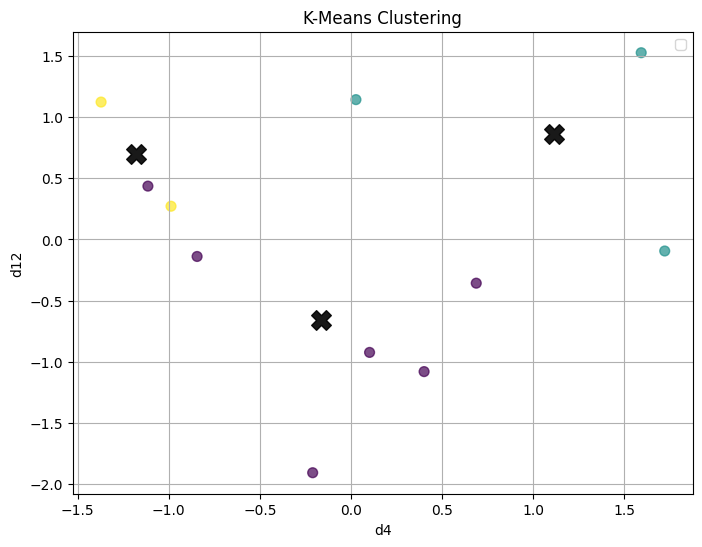

In [5]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(data_scaled)
fh,fv=1,3
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, fh], data_scaled[:, fv], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, fh], centers[:, fv], c='black', s=200, alpha=0.9, marker='X')

plt.title('K-Means Clustering')
plt.xlabel(f'd{fh*4}')
plt.ylabel(f'd{fv*4}')
plt.legend()
plt.grid(True)
plt.show()
